### Support Vector Machines
To use SVM to classify digit data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

print("Libraries imported!")

Libraries imported!


The data which we are going to be using is made up of 8x8 images of digits. It is part of sklearn datasets

Let's load our data and perform investigations

In [2]:
digits = datasets.load_digits()

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

#### Lets open up an individual image and see what it contains

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
digits.images.shape

(1797, 8, 8)

Our digits dataset is composed of 1797 samples of image, which has 64 features! - > 8x8 size of ourr image! 64 pixels meaning 64 features.

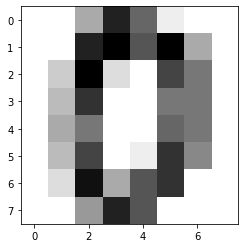

In [15]:
im1 = np.reshape(digits.data[0], (8,8))#reshape our data
plt.imshow(im1, cmap=plt.cm.gray_r)

#### Pre-process our data

In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                         test_size=0.3, random_state=30)

### Train our Support Vector Machine model

In [18]:
from sklearn import svm #Step 1 :  import svm
svmclass = svm.SVC() #Step 2: initialise our model
svmclass.fit(X_train, y_train)#Step 3 :  fit our model/ train our model
print("Training is complete")

Training is complete


In [20]:
#Get our predictions
#Step 4 : get predictions of our data
y_pred = svmclass.predict(X_test)
y_pred

array([8, 1, 6, 5, 3, 8, 3, 2, 1, 2, 5, 8, 1, 2, 9, 1, 5, 1, 8, 2, 1, 0,
       5, 0, 3, 5, 4, 1, 0, 5, 2, 5, 8, 7, 5, 8, 3, 2, 9, 4, 9, 0, 5, 3,
       1, 6, 9, 6, 0, 9, 4, 9, 4, 4, 4, 2, 6, 2, 5, 5, 8, 6, 9, 6, 9, 7,
       3, 8, 4, 1, 4, 8, 0, 1, 6, 1, 6, 2, 5, 7, 8, 5, 9, 2, 7, 6, 9, 2,
       4, 5, 5, 8, 8, 0, 1, 2, 5, 4, 1, 2, 7, 8, 6, 8, 1, 0, 6, 0, 1, 0,
       3, 1, 5, 3, 4, 1, 4, 6, 7, 2, 0, 9, 1, 2, 5, 6, 8, 8, 8, 1, 5, 0,
       2, 4, 0, 6, 0, 4, 1, 2, 8, 7, 9, 4, 0, 4, 3, 6, 7, 2, 6, 1, 6, 6,
       7, 2, 1, 3, 4, 0, 9, 7, 2, 2, 0, 7, 4, 7, 6, 8, 5, 6, 0, 1, 1, 1,
       4, 8, 2, 6, 5, 4, 0, 2, 7, 3, 6, 2, 3, 7, 7, 4, 0, 8, 5, 1, 1, 7,
       6, 3, 5, 3, 2, 9, 9, 9, 9, 4, 4, 1, 0, 2, 7, 1, 8, 4, 8, 7, 3, 7,
       0, 6, 8, 7, 3, 1, 3, 3, 7, 1, 3, 0, 3, 6, 4, 9, 0, 9, 6, 2, 2, 0,
       4, 2, 8, 7, 1, 4, 8, 0, 6, 6, 7, 2, 2, 8, 6, 9, 6, 2, 4, 5, 9, 9,
       1, 1, 8, 9, 6, 7, 5, 6, 4, 0, 2, 4, 3, 2, 2, 1, 7, 7, 5, 5, 5, 2,
       5, 8, 8, 4, 6, 9, 9, 2, 1, 3, 5, 7, 1, 0, 7,

In [22]:
df1 = pd.DataFrame({"Original":y_test, "Predicted":y_pred})
df1.head(20)

,Original,Predicted
0,8,8
1,1,1
2,6,6
3,5,5
4,3,3
5,8,8
6,3,3
7,2,2
8,1,1
9,2,2


In [27]:
df1[df1["Original"] != df1["Predicted"]]

,Original,Predicted
14,4,9
19,3,2
357,9,3
379,6,8
401,9,8
422,0,4
478,3,5
535,8,1


### Get our metrics of our model

In [28]:
from sklearn.metrics import accuracy_score, precision_score# Step 5: model evaluation

acc = accuracy_score(y_test,y_pred)

print("Accuracy : ", acc)

Accuracy :  0.9851851851851852


In [30]:
pre = precision_score(y_test,y_pred, average=None)
print("Precision : ", pre)

Precision :  [1.         0.98275862 0.98387097 0.97727273 0.98275862 0.98214286
 1.         1.         0.96       0.9787234 ]


### Exercise! Train and test an SVM model on the Iris Dataset!

In [31]:
#start with import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

print("Imported our libraries!")

Imported our libraries!


In [32]:
iris = datasets.load_iris()

#this is our X
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_target = iris.target #this is your y!

In [33]:
#pre-process our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(iris_df, iris_target, test_size=0.3, 
                                                   random_state=30)

In [34]:
from sklearn import svm #Step 1 :  import svm
svmclass = svm.SVC() #Step 2: initialise our model
svmclass.fit(X_train, y_train)#Step 3 :  fit our model/ train our model
print("Training is complete")

Training is complete


In [35]:
#Get our predictions
#Step 4 : get predictions of our data
y_pred = svmclass.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       2])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix# Step 5: model evaluation

acc = accuracy_score(y_test,y_pred)

print("Accuracy : ", acc)

Accuracy :  0.9333333333333333


In [40]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 16]], dtype=int64)

### End of SVM workshop!